# Titanic Dataset Analysis


## Data Visualization

In [2]:

DATA_LOCATION = "../data/"

### Gender survival plots

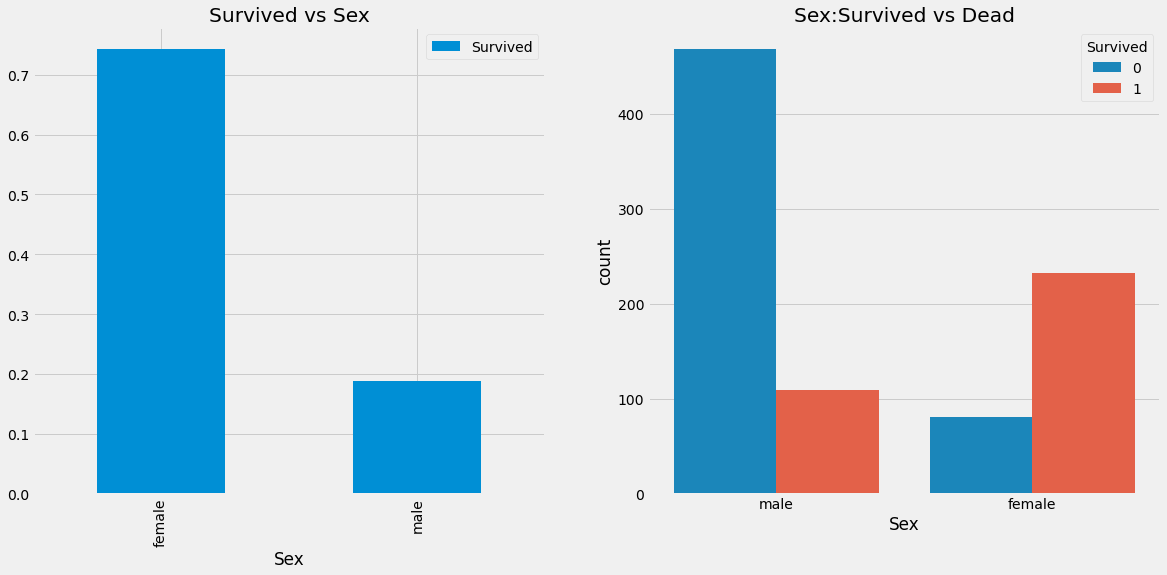

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
data= pd.read_csv( DATA_LOCATION + 'raw/train.csv')
data

f,ax=plt.subplots(1,2,figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=data,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')

plt.show()

# plt.savefig('gender_survival_plots.png')


### Survival plots

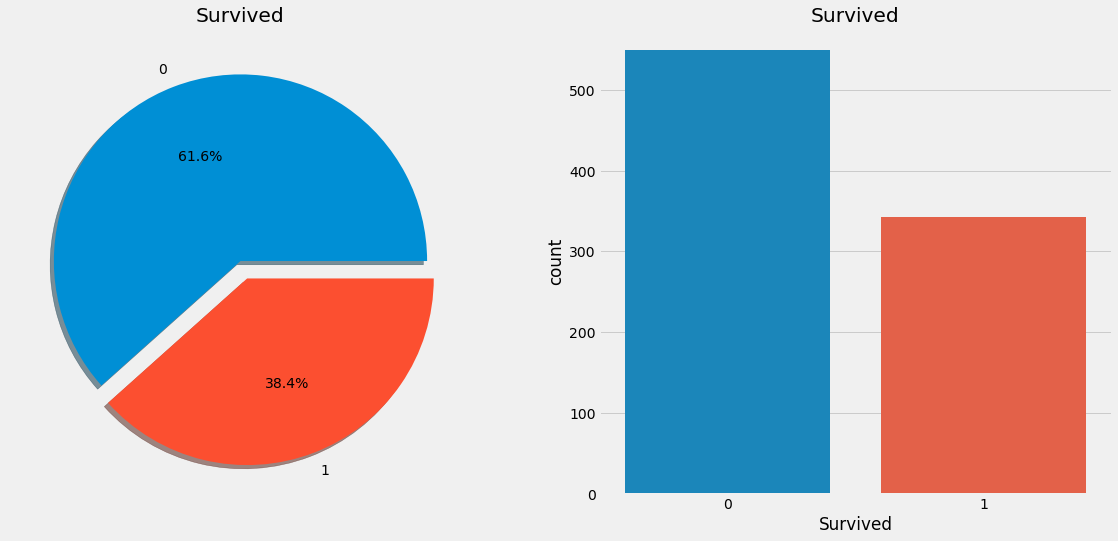

<Figure size 432x288 with 0 Axes>

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

data= pd.read_csv( DATA_LOCATION + 'raw/train.csv')

f,ax=plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=data,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

plt.savefig('survival_plots.png')


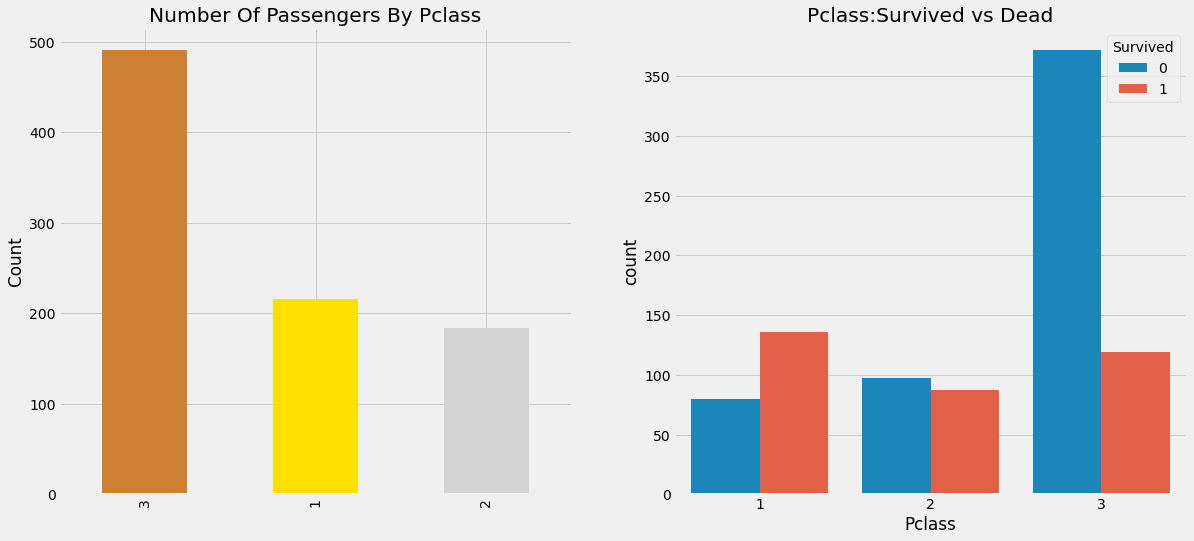

In [19]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
import warnings

warnings.filterwarnings('ignore')

data= pd.read_csv( DATA_LOCATION + 'raw/train.csv')

f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
# plt.show()

plt.savefig('passenger_pclass_plots.png')

## Feature Engineering

### Derive features

In [3]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

data= pd.read_csv( DATA_LOCATION + 'raw/train.csv')

data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations

data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


### Process NaN

In [4]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# data= pd.read_csv( DATA_LOCATION + 'raw/train.csv')

data['Embarked'].fillna('S',inplace=True)

data.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


### Process Age

In [5]:
import warnings
warnings.filterwarnings('ignore')


## Assigning the NaN Values with the Ceil values of the mean ages
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2


### Process Family

In [6]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1

data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_Size,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2,0,1


### Process Fare

In [7]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

data['Fare_Range']=pd.qcut(data['Fare'],4)

data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3


data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_Size,Alone,Fare_Range,Fare_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,1,0,"(-0.001, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2,1,0,"(31.0, 512.329]",3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1,0,1,"(7.91, 14.454]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2,1,0,"(31.0, 512.329]",3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2,0,1,"(7.91, 14.454]",1


### Replace features

In [8]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
data['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)


data.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cat
0,0,3,0,1,0,0,0,1,1,0,0
1,1,1,1,1,0,1,1,2,1,0,3
2,1,3,1,0,0,0,2,1,0,1,1
3,1,1,1,1,0,0,1,2,1,0,3
4,0,3,0,0,0,0,0,2,0,1,1


### Test train analysis

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['Survived'])

In [12]:
train_X=train[train.columns[1:]]
train_X.to_csv("train_X.csv")
train_X

,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cat
231,3,0,0,0,0,0,1,0,1,0
836,3,0,0,0,0,0,1,0,1,1
639,3,0,1,0,0,0,2,1,0,2
389,2,1,0,0,1,2,1,0,1,1
597,3,0,0,0,0,0,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...
131,3,0,0,0,0,0,1,0,1,0
490,3,0,1,0,0,0,2,1,0,2
838,3,0,0,0,0,0,1,0,1,3
48,3,0,2,0,1,0,2,2,0,2


In [13]:
train_Y=train[train.columns[:1]]
train_Y.to_csv("train_Y.csv")
train_Y

,Survived
231,0
836,0
639,0
389,1
597,0
...,...
131,0
490,0
838,1
48,0


In [14]:
test_X=test[test.columns[1:]]
test_X.to_csv("test_X.csv")
test_X

,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cat
421,3,0,0,0,2,0,1,0,1,0
618,2,1,2,1,0,2,0,3,0,3
116,3,0,0,0,2,0,4,0,1,0
310,1,1,0,0,1,2,1,0,1,3
57,3,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
653,3,1,0,0,2,2,1,0,1,0
500,3,0,0,0,0,0,1,0,1,1
512,1,0,0,0,0,0,2,0,1,2
758,3,0,0,0,0,0,2,0,1,1


In [15]:
test_Y=test[test.columns[:1]]
test_Y.to_csv("test_Y.csv")
test_Y

,Survived
421,0
618,1
116,0
310,1
57,0
...,...
653,1
500,0
512,1
758,0


In [16]:
X=data[data.columns[1:]]
X.to_csv("X.csv")
X

,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cat
0,3,0,1,0,0,0,1,1,0,0
1,1,1,1,0,1,1,2,1,0,3
2,3,1,0,0,0,2,1,0,1,1
3,1,1,1,0,0,1,2,1,0,3
4,3,0,0,0,0,0,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...
886,2,0,0,0,0,4,1,0,1,1
887,1,1,0,0,0,2,1,0,1,2
888,3,1,1,2,0,2,1,3,0,2
889,1,0,0,0,1,0,1,0,1,2


In [17]:
Y=data['Survived']
Y.to_csv("Y.csv")
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64